In [1]:
import torch
import torchvision
import image_utils
import numpy as np
import matplotlib.pyplot as plt
import dcgan
import csgm
import skimage

In [2]:
mnist = torchvision.datasets.MNIST('./', train=False, transform=lambda x: np.array(x)/255.,
                                   target_transform=None, download=True)

In [3]:
len(mnist)

10000

In [4]:
test_img = mnist[0][0]

In [5]:
test_img.shape

(28, 28)

(<matplotlib.image.AxesImage at 0x7f62a86332e8>, 5)

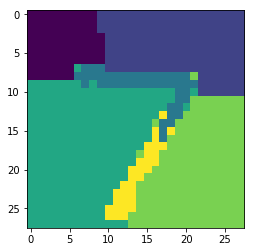

In [6]:
segments = image_utils.create_segments(test_img, kernel_size=2, max_dist=10, ratio=0.2)
plt.imshow(segments), np.max(segments)

In [7]:
exp = {}
exp['feature']=[1,4,5]
_,mask = image_utils.create_mask(test_img,segments,exp)

In [8]:
target = ((test_img-0.5)*2) * mask

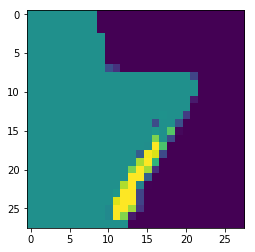

In [9]:
plt.imshow(target)

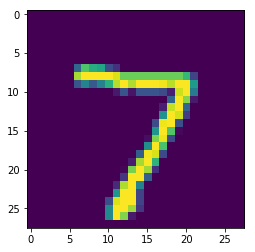

In [10]:
plt.imshow(test_img)

In [11]:
np.sum(mask)

524.0

## CSGM

In [11]:
G = dcgan.load_generator().cuda()

In [12]:
target.shape

(28, 28)

In [13]:
batch_target = np.repeat(target[np.newaxis,:,:], 32, 0)
batch_target.shape

(32, 28, 28)

In [14]:
%%time
raw_,background = csgm.reconstruct(target, mask, np.sum(mask), G, 1, threshold=0.05)

0 36 0.049004037
CPU times: user 118 ms, sys: 31.4 ms, total: 150 ms
Wall time: 152 ms


Text(0.5,1,'GAN Reconstruction')

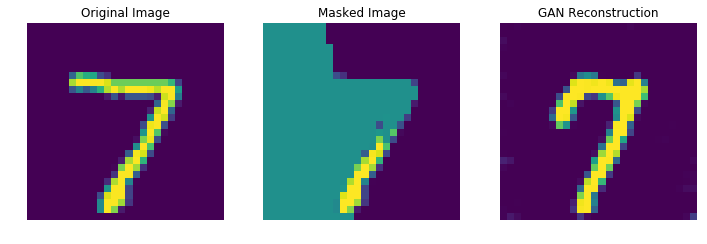

In [23]:
fig, ax = plt.subplots(1,3,figsize = (12,12))
[ax[i].set_axis_off() for i in range(3)]
ax[0].imshow((test_img-0.5)*2, vmin=-1,vmax=1)
ax[0].set_title('Original Image')
ax[1].imshow(target)
ax[1].set_title('Masked Image')
ax[2].imshow(raw_[0],vmin=-1, vmax=1)
ax[2].set_title('GAN Reconstruction')

In [44]:
raw_,background,loss = csgm.reconstruct(batch_target, mask, np.sum(mask), G, 32)

In [16]:
loss

array([0.5644338 , 0.58505225, 0.5824897 , 0.5922452 , 0.41746932,
       0.52844036, 0.5999736 , 0.6396723 , 0.48016474, 0.61739427,
       1.2067202 , 0.44882846, 0.43336174, 0.58771104, 0.6087078 ,
       0.45373723, 0.5272461 , 0.5846504 , 0.4573114 , 0.48311302,
       0.4347931 , 0.5781761 , 0.542709  , 0.44655803, 0.42765176,
       0.5135419 , 0.47119012, 0.5949466 , 0.56355387, 0.6006658 ,
       0.49719524, 0.56157047], dtype=float32)

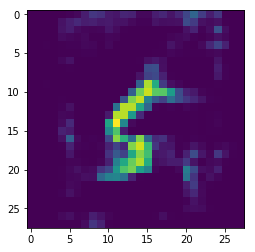

In [26]:
plt.imshow(raw_[7])

In [16]:
x = G(torch.from_numpy(best_z).cuda()).data.cpu().numpy()[0].squeeze()

NameError: name 'best_z' is not defined

In [133]:
x.shape

(28, 28)

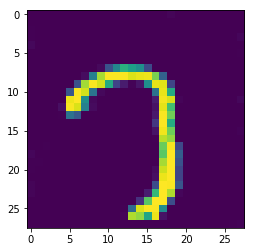

In [134]:
plt.imshow(x)

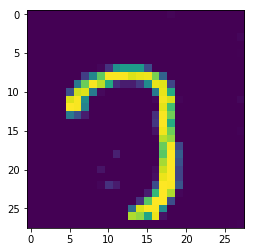

In [135]:
plt.imshow(target + (1-mask)*x)